### Chapter 8 - Deep Learning ANN Example:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=2000, centers=2, n_features=4, random_state=1, cluster_std=5)

In [3]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
scalar.fit(X)

MinMaxScaler()

In [4]:
X_scaled = scalar.transform(X)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25)

In [33]:
dfx_train = pd.DataFrame(X_train, columns=["Feature1", "Feature2", "Feature3", "Feature4"])
dfx_train

,Feature1,Feature2,Feature3,Feature4
0,0.574143,0.517287,0.653328,0.419282
1,0.438718,0.687339,0.732762,0.602197
2,0.454498,0.411297,0.560572,0.486019
3,0.758072,0.140497,0.462432,0.393466
4,0.595967,0.794863,0.406181,0.242629
...,...,...,...,...
1495,0.433280,0.356902,0.547584,0.407951
1496,0.367920,0.328708,0.774894,0.457759
1497,0.529657,0.605698,0.739527,0.648285
1498,0.398777,0.583251,0.480954,0.596516


In [77]:
len(y_train)

1500

In [76]:
print(y_train)

[1 0 1 ... 0 0 0]


<AxesSubplot:xlabel='Feature1', ylabel='Feature2'>

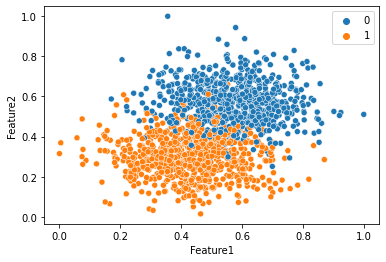

In [34]:
sns.scatterplot(x=dfx_train.Feature1, y=dfx_train.Feature2, hue=y_train)

In [35]:
from keras.models import Sequential
model = Sequential()

In [36]:
from keras.layers import Dense
model.add(Dense(4, input_dim=2, activation='relu', name="DenseLayer1"))

In [37]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
DenseLayer1 (Dense)          (None, 4)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.add(Dense(4, input_dim=2, activation='relu', name="DenseLayer2"))

In [39]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
DenseLayer1 (Dense)          (None, 4)                 12        
_________________________________________________________________
DenseLayer2 (Dense)          (None, 4)                 20        
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


In [40]:
model = Sequential()
model.add(Dense(4, input_shape=(4,), activation='relu', name="DenseLayer1"))
model.add(Dense(8, activation='relu', name="DenseLayer2"))
model.add(Dense(1, activation='sigmoid', name="DenseLayer3"))

In [41]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

In [42]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
DenseLayer1 (Dense)          (None, 4)                 20        
_________________________________________________________________
DenseLayer2 (Dense)          (None, 8)                 40        
_________________________________________________________________
DenseLayer3 (Dense)          (None, 1)                 9         
Total params: 69
Trainable params: 69
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model.fit(X_train, y_train, epochs=75, verbose=1, validation_split=0.2)

Epoch 1/75
38/38 [==============================] - 1s 5ms/step - loss: 0.6541 - accuracy: 0.5433 - val_loss: 0.6294 - val_accuracy: 0.7300
Epoch 2/75
38/38 [==============================] - 0s 2ms/step - loss: 0.6282 - accuracy: 0.8008 - val_loss: 0.6064 - val_accuracy: 0.8667
Epoch 3/75
38/38 [==============================] - 0s 2ms/step - loss: 0.6024 - accuracy: 0.8542 - val_loss: 0.5785 - val_accuracy: 0.8767
Epoch 4/75
38/38 [==============================] - 0s 2ms/step - loss: 0.5723 - accuracy: 0.8850 - val_loss: 0.5467 - val_accuracy: 0.8933
Epoch 5/75
38/38 [==============================] - 0s 2ms/step - loss: 0.5396 - accuracy: 0.8900 - val_loss: 0.5124 - val_accuracy: 0.8933
Epoch 6/75
38/38 [==============================] - 0s 2ms/step - loss: 0.5051 - accuracy: 0.9025 - val_loss: 0.4800 - val_accuracy: 0.9033
Epoch 7/75
38/38 [==============================] - 0s 2ms/step - loss: 0.4715 - accuracy: 0.9025 - val_loss: 0.4449 - val_accuracy: 0.8967
Epoch 8/75
38/38 [==

In [90]:
y_pred = (model.predict(X_test) > 0.5).astype("int32").ravel()

In [91]:
y_pred[:10]

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int32)

In [92]:
y_test[:10]

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [93]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       266
           1       0.92      0.94      0.93       234

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



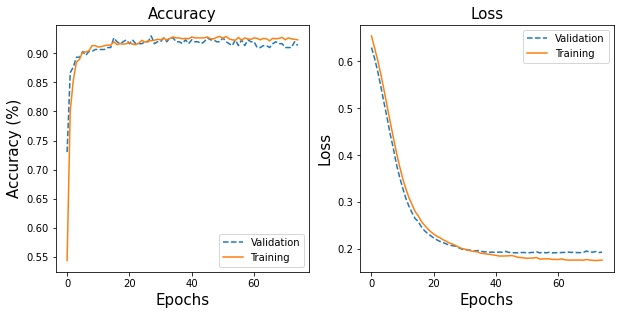

In [95]:
fig = plt.figure(figsize=(10,10))

# total_rows, total_columns, subplot_index(1st, 2nd, etc..)
plt.subplot(2, 2, 1)
plt.title("Accuracy", fontsize=15)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)
plt.plot(history.history["val_accuracy"], label='Validation Accuracy', linestyle='dashed')
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.legend(["Validation", "Training"], loc="lower right")

plt.subplot(2, 2, 2)
plt.title("Loss", fontsize=15)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.plot(history.history["val_loss"], label='Validation loss', linestyle='dashed')
plt.plot(history.history["loss"], label='Training loss')
plt.legend(["Validation", "Training"], loc="upper right")